# EDA on Google Play Store data

### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the Dataset into a dataframe

In [2]:
# Read data from CSV format
GPStore = pd.read_csv('googleplaystore.csv')

In [3]:
# Checking type of Dataframe
type(GPStore)

pandas.core.frame.DataFrame

In [4]:
# View Dataframe's head/tail
GPStore.head(10)
GPStore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Checking Dataframe's dimension/shape
GPStore.shape

(10841, 13)

In [6]:
# Checking column's datatype
GPStore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Explore all columns one by one and check for invalid data and clean data accordingly. 

#### App Column:
###### Check for duplicate values in App column if any then drop those rows. 

In [7]:
GPStore['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [8]:
print(GPStore.shape)
GPStore = GPStore.drop_duplicates(subset=['App'], keep = 'first')
print(GPStore.shape)

(10841, 13)
(9660, 13)


### Category Column:
##### Check for unique categories. 

In [9]:
GPStore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

<b> In the 'Category' column we have one value as '1.9' which seems to be invalid. Let's have a look at that data entry. 

In [10]:
GPStore[GPStore.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
GPStore.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839,
            10840],
           dtype='int64', length=9660)

In [12]:
GPStore=GPStore.drop([10472],axis=0)

In [13]:
GPStore.shape

(9659, 13)

### Rating Column:
###### Check for valid rating values

In [14]:
GPStore['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

<b> All the rating values are within the range so no invalid data is present in 'Rating' Column. But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.  

In [15]:
GPStore.Rating.isnull().sum()

1463

<b> Drop the entries having null values. 

In [16]:
GPStore.dropna(inplace=True)

In [17]:
GPStore.shape

(8190, 13)

### Review Column:
###### Check for any non numeric values if any replace it and convert it to a numeric column

In [18]:
GPStore.Reviews.describe()    # The datatype for the reviews column is string 

count     8190
unique    5319
top          2
freq        82
Name: Reviews, dtype: object

In [19]:
GPStore.Reviews.str.isnumeric().sum()   # check for any non numeric value 

8190

In [20]:
GPStore.Reviews=pd.to_numeric(GPStore.Reviews) # convert the 'Review' column to numeric

In [21]:
GPStore.Reviews.describe()

count    8.190000e+03
mean     2.554354e+05
std      1.986309e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.009500e+03
75%      4.391425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

### Size Column:
#####  In the 'Size' column we have the values as '20M' and '10K' which represents the size of app in MB and KB respectively. So replace 'M' and 'K' with their equivalent numeric values in bytes. 

In [22]:
GPStore.Size.value_counts()

Varies with device    1169
14M                    148
12M                    146
13M                    143
11M                    143
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [23]:
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('M', '000') if 'M' in x else x)
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('k','') if 'k' in x else x)
GPStore.Size = GPStore.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in x else x)
GPStore.Size = GPStore.Size.apply(lambda x: float(x))

In [24]:
GPStore.Size.describe()

count      8190.000000
mean      16977.880867
std       23463.754851
min           0.000000
25%           3.300000
50%         459.500000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

In [25]:
GPStore=GPStore.rename(columns={'Size':'Size_in_KB'})   # rename the Size column to Size_in_KB 

### Installs column:
###### The Installs column shows the number of installations for an app. The values consists of '+' and ',' characters. So remove '+' and ',' present in Installs column and convert it to numeric. 

In [26]:
GPStore.Installs=GPStore.Installs.apply(lambda x: x.strip('+'))
GPStore.Installs=GPStore.Installs.apply(lambda x: x.replace(',',''))
#GPStore.Installs=GPStore.Installs.replace('Free',np.nan)
GPStore.Installs.value_counts()

1000000       1414
100000        1094
10000          986
10000000       937
1000           696
5000000        607
500000         503
50000          456
5000           424
100            303
50000000       202
500            199
100000000      188
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

In [27]:
GPStore.Installs=pd.to_numeric(GPStore.Installs)

### Check the values in Type column 
##### The type of the app is categorized as "Free" or "Paid" and we have these values only. So no cleaning is required for this column.

In [28]:
GPStore.Type.value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

### Price Column
#####  The data for the paid apps is prefix with "\\$" character. Remove "$" before the price and convert it to numeric

In [29]:
GPStore.Price=GPStore.Price.apply(lambda x: x.strip('$'))

In [30]:
GPStore.Price=pd.to_numeric(GPStore.Price)

In [31]:
GPStore.Price.describe()

count    8190.000000
mean        1.038342
std        16.864040
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

### Content Rating column

In [32]:
GPStore['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Geners Column


In [33]:
GPStore.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

### Last Updated column
#### Check for the data and convert it into date format

In [34]:
GPStore['Last Updated']=pd.to_datetime(GPStore['Last Updated'])

In [35]:
GPStore['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

### Current Ver Column
##### Check for the nan values

In [36]:
GPStore['Current Ver'].isnull().sum()

0

In [37]:
GPStore['Current Ver'].value_counts()

Varies with device    1011
1.0                    449
1.1                    190
1.2                    125
2.0                    117
                      ... 
11.0.269 (m)             1
4.13.2                   1
13.0.16                  1
8.13.3                   1
0.3.4                    1
Name: Current Ver, Length: 2624, dtype: int64

### Andriod Ver

In [38]:
GPStore['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

## Data Manipulation using Pandas

## 1. Display the details of all apps under 'ART_AND_DESIGN' category

In [39]:
GPStore[GPStore['Category']=='ART_AND_DESIGN']

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.00,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.00,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.00,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.00,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.00,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.00,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.00,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.00,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


## 2. Find the rating of 'Word Search' App. 

In [40]:
GPStore[GPStore.App == 'Word Search']

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1678,Word Search,GAME,4.7,295241,3.9,10000000,Free,0.0,Everyone,Word,2018-06-06,1.1.3,3.0 and up


## 3. Retrieve the first five rows and first five columns from the dataset.

In [41]:
GPStore.iloc[:5,:5]

,App,Category,Rating,Reviews,Size_in_KB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8


## 4. Find the number of App's that have more than 1 lakh installs. 

In [42]:
GPStore[GPStore.Installs > 100000].count()

App               3895
Category          3895
Rating            3895
Reviews           3895
Size_in_KB        3895
Installs          3895
Type              3895
Price             3895
Content Rating    3895
Genres            3895
Last Updated      3895
Current Ver       3895
Android Ver       3895
dtype: int64

## 5. Count the number of Apps under each Category. 

In [43]:
GPStore.Category.value_counts()

FAMILY                 1607
GAME                    912
TOOLS                   717
FINANCE                 302
PRODUCTIVITY            301
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
MAPS_AND_NAVIGATION     118
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [44]:
GPStore[['App','Category']].groupby('Category',as_index=False).count()

,Category,App
0,ART_AND_DESIGN,60
1,AUTO_AND_VEHICLES,73
2,BEAUTY,42
3,BOOKS_AND_REFERENCE,169
4,BUSINESS,263
5,COMICS,54
6,COMMUNICATION,256
7,DATING,134
8,EDUCATION,118
9,ENTERTAINMENT,102


## 6. Display the average ratings of apps under each category.

In [45]:
GPStore[['Rating','Category']].groupby('Category',as_index=False).mean()

,Category,Rating
0,ART_AND_DESIGN,4.376667
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.344970
4,BUSINESS,4.098479
5,COMICS,4.181481
6,COMMUNICATION,4.121484
7,DATING,3.970149
8,EDUCATION,4.364407
9,ENTERTAINMENT,4.135294


## 7. Find the number of Apps and the average rating of Apps under each category. 

In [46]:
GPStore[['Rating','Category']].groupby('Category',as_index=False).aggregate([np.count_nonzero, np.mean])

Rating          
                    count_nonzero      mean
Category                                   
ART_AND_DESIGN                 60  4.376667
AUTO_AND_VEHICLES              73  4.190411
BEAUTY                         42  4.278571
BOOKS_AND_REFERENCE           169  4.344970
BUSINESS                      263  4.098479
COMICS                         54  4.181481
COMMUNICATION                 256  4.121484
DATING                        134  3.970149
EDUCATION                     118  4.364407
ENTERTAINMENT                 102  4.135294
EVENTS                         45  4.435556
FAMILY                       1607  4.179776
FINANCE                       302  4.115563
FOOD_AND_DRINK                 94  4.172340
GAME                          912  4.247368
HEALTH_AND_FITNESS            244  4.243033
HOUSE_AND_HOME                 62  4.150000
LIBRARIES_AND_DEMO             63  4.179365
LIFESTYLE                     301  4.093355
MAPS_AND_NAVIGATION           118  4.036441
MEDICAL                       290  4.166552
NEWS_AND_MAGAZINES            204  4.121569
PARENTING                      50  4.300000
PERSONALIZATION               296  4.331419
PHOTOGRAPHY                   263  4.157414
PRODUCTIVITY                  301  4.183389
SHOPPING                      180  4.230000
SOCIAL                        203  4.247291
SPORTS                        260  4.216154
TOOLS                         717  4.039331
TRAVEL_AND_LOCAL              187  4.069519
VIDEO_PLAYERS                 148  4.044595
WEATHER                        72  4.243056

## 8. Find the apps that are updated after '1st Jan 2018'

In [47]:
GPStore[GPStore['Last Updated'] > '2018-01-01'].count()

App               5442
Category          5442
Rating            5442
Reviews           5442
Size_in_KB        5442
Installs          5442
Type              5442
Price             5442
Content Rating    5442
Genres            5442
Last Updated      5442
Current Ver       5442
Android Ver       5442
dtype: int64

## 9. Sort the Apps based on the reviews in ascending order.

In [48]:
GPStore.sort_values('Reviews',ascending=False)

,App,Category,Rating,Reviews,Size_in_KB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.00,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.00,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,Free,0.00,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.00,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98000.0,100000000,Free,0.00,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,CR Magazine,BUSINESS,1.0,1,7.8,100,Free,0.00,Everyone,Business,2014-07-23,2.4.2,2.3.3 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,2.0,50,Paid,1.49,Everyone,Education,2012-04-09,1.0,2.1 and up
5489,AP Art History Flashcards,FAMILY,5.0,1,96000.0,10,Paid,29.99,Mature 17+,Education,2016-01-19,3.30,4.0 and up
8325,DF Coaching,SPORTS,4.0,1,3.6,100,Free,0.00,Everyone,Sports,2018-05-24,1.0.1,4.1 and up


## 10. Find the total numbers of free and paid apps for each category. 

In [49]:
GPStore[['App','Category','Type']].groupby(['Category', 'Type'],as_index=False).count() 

,Category,Type,App
0,ART_AND_DESIGN,Free,57
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


## 11. Find the highly rated (>=4.5) free apps and check whether 'candy crush' is one of them. If no, find its rating. 

In [50]:
highly_rated=GPStore[(GPStore.Rating >= 4.5) & (GPStore.Type == 'Free')][['App','Rating','Type','Installs']]
highly_rated[highly_rated.App.str.contains('Candy Crush', case = False)]
#highly_rated.head()

,App,Rating,Type,Installs


In [51]:
GPStore[GPStore.App.str.contains('candy crush', case = False)][['App','Rating']]

,App,Rating
1655,Candy Crush Saga,4.4
1668,Candy Crush Soda Saga,4.4
1688,Candy Crush Jelly Saga,4.3


## Split the Data into two dataframe one consisting app details and another app statistics

In [52]:
#GPStore = pd.read_csv('googleplaystore.csv')

In [53]:
GPStore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_KB', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [54]:
col1 = GPStore.columns.difference(['Rating','Reviews','Installs','Last Updated'])
col1

Index(['Android Ver', 'App', 'Category', 'Content Rating', 'Current Ver',
       'Genres', 'Price', 'Size_in_KB', 'Type'],
      dtype='object')

In [55]:
col2 = ['App','Rating','Reviews','Installs','Last Updated']
col2

['App', 'Rating', 'Reviews', 'Installs', 'Last Updated']

In [56]:
App_details = GPStore.loc[:,col1]
print(App_details.shape)
App_details.head()

(8190, 9)


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Price,Size_in_KB,Type
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0.0,Art & Design,0.0,19000.0,Free
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0.0,Art & Design;Pretend Play,0.0,14000.0,Free
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,1.2.4,Art & Design,0.0,8.7,Free
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,0.0,25000.0,Free
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,0.0,2.8,Free


In [57]:
App_statistics = GPStore.loc[:,col2]
print(App_statistics.shape)
App_statistics.head()

(8190, 5)


,App,Rating,Reviews,Installs,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,2018-01-07
1,Coloring book moana,3.9,967,500000,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,2018-08-01
3,Sketch - Draw & Paint,4.5,215644,50000000,2018-06-08
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,2018-06-20


In [58]:
App_statistics = App_statistics.iloc[:8000,:]
print(App_statistics.shape)
App_statistics.tail()

(8000, 5)


,App,Rating,Reviews,Installs,Last Updated
10556,FK Željezničar Izzy,4.9,119,1000,2016-11-18
10562,FK Atlantas,1.5,2,5,2018-02-21
10564,FK Dedinje BGD,5.0,36,100,2017-02-11
10566,FK Crvena Zvezda Izzy,4.8,1456,50000,2016-11-14
10568,Crazy Freekick,3.9,47688,5000000,2016-05-18


## 12. Merge the 'App_details' dataframe and 'App_statistics' dataframe to get the GPStore dataframe back.

In [59]:
merged_df = App_details.merge(App_statistics,on='App',how='inner')
print(merged_df.shape)
merged_df.head()

(8000, 13)


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Price,Size_in_KB,Type,Rating,Reviews,Installs,Last Updated
0,4.0.3 and up,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Everyone,1.0.0,Art & Design,0.0,19000.0,Free,4.1,159,10000,2018-01-07
1,4.0.3 and up,Coloring book moana,ART_AND_DESIGN,Everyone,2.0.0,Art & Design;Pretend Play,0.0,14000.0,Free,3.9,967,500000,2018-01-15
2,4.0.3 and up,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Everyone,1.2.4,Art & Design,0.0,8.7,Free,4.7,87510,5000000,2018-08-01
3,4.2 and up,Sketch - Draw & Paint,ART_AND_DESIGN,Teen,Varies with device,Art & Design,0.0,25000.0,Free,4.5,215644,50000000,2018-06-08
4,4.4 and up,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Everyone,1.1,Art & Design;Creativity,0.0,2.8,Free,4.3,967,100000,2018-06-20


## 13. Perform left join on 'App_details' and 'App_statistics' dataframe

In [60]:
left_df = pd.merge(App_details,App_statistics,on='App',how='left')
print(left_df.shape)
left_df.tail()

(8190, 13)


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Price,Size_in_KB,Type,Rating,Reviews,Installs,Last Updated
8185,4.1 and up,FR Calculator,FAMILY,Everyone,1.0.0,Education,0.0,2.6,Free,NaN,NaN,NaN,NaT
8186,4.1 and up,Sya9a Maroc - FR,FAMILY,Everyone,1.48,Education,0.0,53000.0,Free,NaN,NaN,NaN,NaT
8187,4.1 and up,Fr. Mike Schmitz Audio Teachings,FAMILY,Everyone,1.0,Education,0.0,3.6,Free,NaN,NaN,NaN,NaT
8188,Varies with device,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Mature 17+,Varies with device,Books & Reference,0.0,0.0,Free,NaN,NaN,NaN,NaT
8189,Varies with device,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,Everyone,Varies with device,Lifestyle,0.0,19000.0,Free,NaN,NaN,NaN,NaT


## 14. Perform right join on 'App_details' and 'App_statistics' dataframe

In [61]:
right_df = pd.merge(App_details,App_statistics,on='App',how='right')
print(right_df.shape)
right_df.tail()

(8000, 13)


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Price,Size_in_KB,Type,Rating,Reviews,Installs,Last Updated
7995,4.4 and up,FK Željezničar Izzy,FAMILY,Everyone,1.0,Entertainment,0.0,17000.0,Free,4.9,119,1000,2016-11-18
7996,4.1 and up,FK Atlantas,SPORTS,Everyone,1.0,Sports,0.0,26000.0,Free,1.5,2,5,2018-02-21
7997,4.0 and up,FK Dedinje BGD,SPORTS,Everyone,1.1,Sports,0.0,2.6,Free,5.0,36,100,2017-02-11
7998,4.4 and up,FK Crvena Zvezda Izzy,TOOLS,Everyone,1.2,Tools,0.0,15000.0,Free,4.8,1456,50000,2016-11-14
7999,2.3 and up,Crazy Freekick,SPORTS,Everyone,1.0.15,Sports,0.0,17000.0,Free,3.9,47688,5000000,2016-05-18


## 15. Perform outer join on 'App_details' and 'App_statistics' dataframe

In [62]:
outer_df = pd.merge(App_details,App_statistics,on='App',how='outer')
print(outer_df.shape)
outer_df.tail()

(8190, 13)


,Android Ver,App,Category,Content Rating,Current Ver,Genres,Price,Size_in_KB,Type,Rating,Reviews,Installs,Last Updated
8185,4.1 and up,FR Calculator,FAMILY,Everyone,1.0.0,Education,0.0,2.6,Free,NaN,NaN,NaN,NaT
8186,4.1 and up,Sya9a Maroc - FR,FAMILY,Everyone,1.48,Education,0.0,53000.0,Free,NaN,NaN,NaN,NaT
8187,4.1 and up,Fr. Mike Schmitz Audio Teachings,FAMILY,Everyone,1.0,Education,0.0,3.6,Free,NaN,NaN,NaN,NaT
8188,Varies with device,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Mature 17+,Varies with device,Books & Reference,0.0,0.0,Free,NaN,NaN,NaN,NaT
8189,Varies with device,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,Everyone,Varies with device,Lifestyle,0.0,19000.0,Free,NaN,NaN,NaN,NaT


## Data Visualization using matplotlib 

### 1. Draw a histogram for rating column

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

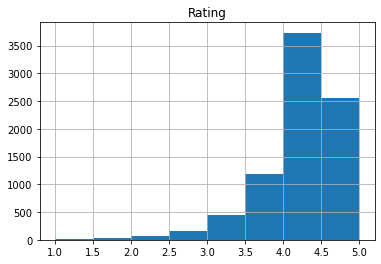

In [63]:
GPStore.hist('Rating',bins=8)

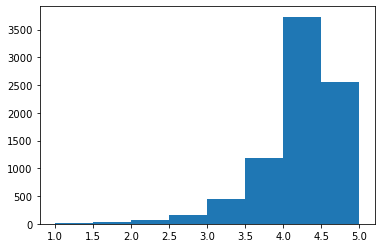

In [64]:
plt.hist(GPStore['Rating'],8);

### 2. Draw a barchart for number of apps under each category

<AxesSubplot:xlabel='Category'>

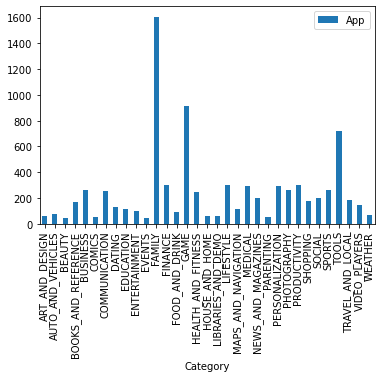

In [65]:
categorycount=GPStore[['Category','App']].groupby('Category',as_index=False).count()
categorycount
categorycount.plot.bar('Category','App')

<AxesSubplot:xlabel='Category'>

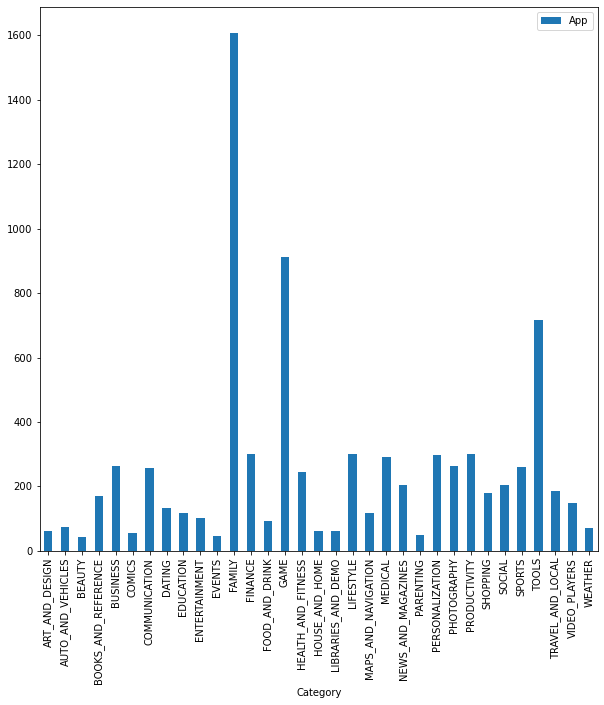

In [66]:
categorycount.plot('Category','App',kind='bar',figsize=(10,10))

### 3. Draw a Rating vs Reviews scatter plot 

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

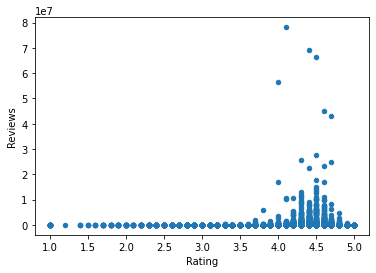

In [67]:
GPStore.plot('Rating','Reviews', kind='scatter')

### 4. Create a box plot on rating and check do we have any outliers. 

<AxesSubplot:>

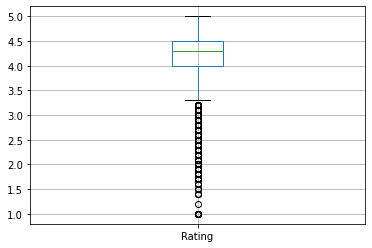

In [68]:
GPStore.boxplot('Rating')  

In [69]:
GPStore.Rating.describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### 5. Draw a Line chart showing the number of app updated each year

In [70]:
#plt.plot(GPStore[:50,'Last Updated'], GPStore[:50,'App'])  

In [71]:
GPStore['year']=GPStore['Last Updated'].dt.year

In [72]:
GPStore['year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64

In [73]:
Yearwise_Updations = GPStore[['year','App','Category']].groupby('year',as_index=False).count()
Yearwise_Updations.shape


(9, 3)

In [74]:
Yearwise_Updations.tail()

,year,App,Category
4,2014,184,184
5,2015,379,379
6,2016,628,628
7,2017,1425,1425
8,2018,5446,5446


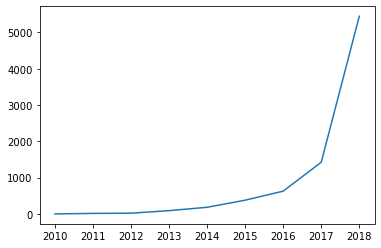

In [75]:
plt.plot(Yearwise_Updations.year,Yearwise_Updations.App)

### 6. Sort the apps under each category based on the installs and display the first ten categories. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

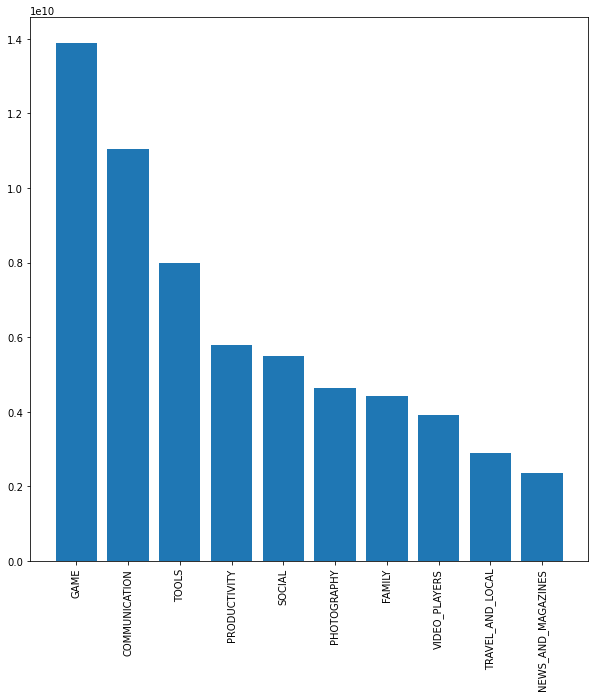

In [76]:
most_installed_apps=GPStore[['Category','Installs']].groupby('Category', as_index=False).sum()
most_installed_apps=most_installed_apps.sort_values('Installs',ascending=False)
most_installed_apps.head(10)
plt.figure(figsize=(10,10))
plt.bar(most_installed_apps.iloc[:10,0], most_installed_apps.iloc[:10,1])
plt.xticks(rotation= 'vertical')

### 7. Draw a stacked bar chart for each category displaying the % of paid and free apps. 

In [77]:
app_cat_type=GPStore[['Category','App','Type']].groupby(['Category','Type'],as_index=False).count()
app_cat_type

,Category,Type,App
0,ART_AND_DESIGN,Free,57
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


In [78]:
free_apps = app_cat_type[app_cat_type['Type']=='Free']
print(free_apps.shape)
paid_apps = app_cat_type[app_cat_type['Type']=='Paid']
print(paid_apps.shape)

(33, 3)
(28, 3)


In [79]:
free_apps.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,57
2,AUTO_AND_VEHICLES,Free,72
4,BEAUTY,Free,42
5,BOOKS_AND_REFERENCE,Free,161
7,BUSINESS,Free,254


In [80]:
paid_apps.head()

,Category,Type,App
1,ART_AND_DESIGN,Paid,3
3,AUTO_AND_VEHICLES,Paid,1
6,BOOKS_AND_REFERENCE,Paid,8
8,BUSINESS,Paid,9
11,COMMUNICATION,Paid,22


In [81]:
temp=free_apps.merge(paid_apps, on= 'Category', how='left')
print(temp.shape)
temp

(33, 5)


,Category,Type_x,App_x,Type_y,App_y
0,ART_AND_DESIGN,Free,57,Paid,3.0
1,AUTO_AND_VEHICLES,Free,72,Paid,1.0
2,BEAUTY,Free,42,NaN,NaN
3,BOOKS_AND_REFERENCE,Free,161,Paid,8.0
4,BUSINESS,Free,254,Paid,9.0
5,COMICS,Free,54,NaN,NaN
6,COMMUNICATION,Free,234,Paid,22.0
7,DATING,Free,131,Paid,3.0
8,EDUCATION,Free,114,Paid,4.0
9,ENTERTAINMENT,Free,100,Paid,2.0


In [82]:
temp['free_app_percentage'] = round((temp['App_x']/(temp['App_x']+temp['App_y']))*100)
temp

,Category,Type_x,App_x,Type_y,App_y,free_app_percentage
0,ART_AND_DESIGN,Free,57,Paid,3.0,95.0
1,AUTO_AND_VEHICLES,Free,72,Paid,1.0,99.0
2,BEAUTY,Free,42,NaN,NaN,NaN
3,BOOKS_AND_REFERENCE,Free,161,Paid,8.0,95.0
4,BUSINESS,Free,254,Paid,9.0,97.0
5,COMICS,Free,54,NaN,NaN,NaN
6,COMMUNICATION,Free,234,Paid,22.0,91.0
7,DATING,Free,131,Paid,3.0,98.0
8,EDUCATION,Free,114,Paid,4.0,97.0
9,ENTERTAINMENT,Free,100,Paid,2.0,98.0


In [83]:
temp['paid_app_percentage'] = round((temp['App_y']/(temp['App_x']+temp['App_y']))*100)
temp

,Category,Type_x,App_x,Type_y,App_y,free_app_percentage,paid_app_percentage
0,ART_AND_DESIGN,Free,57,Paid,3.0,95.0,5.0
1,AUTO_AND_VEHICLES,Free,72,Paid,1.0,99.0,1.0
2,BEAUTY,Free,42,NaN,NaN,NaN,NaN
3,BOOKS_AND_REFERENCE,Free,161,Paid,8.0,95.0,5.0
4,BUSINESS,Free,254,Paid,9.0,97.0,3.0
5,COMICS,Free,54,NaN,NaN,NaN,NaN
6,COMMUNICATION,Free,234,Paid,22.0,91.0,9.0
7,DATING,Free,131,Paid,3.0,98.0,2.0
8,EDUCATION,Free,114,Paid,4.0,97.0,3.0
9,ENTERTAINMENT,Free,100,Paid,2.0,98.0,2.0


In [84]:
temp['free_app_percentage'].fillna(100, inplace=True)


In [85]:
temp['paid_app_percentage'].fillna(0, inplace=True)

In [86]:
temp['free_app_percentage']=temp['free_app_percentage'].astype(int)
temp['paid_app_percentage']=temp['paid_app_percentage'].astype(int)
temp

,Category,Type_x,App_x,Type_y,App_y,free_app_percentage,paid_app_percentage
0,ART_AND_DESIGN,Free,57,Paid,3.0,95,5
1,AUTO_AND_VEHICLES,Free,72,Paid,1.0,99,1
2,BEAUTY,Free,42,NaN,NaN,100,0
3,BOOKS_AND_REFERENCE,Free,161,Paid,8.0,95,5
4,BUSINESS,Free,254,Paid,9.0,97,3
5,COMICS,Free,54,NaN,NaN,100,0
6,COMMUNICATION,Free,234,Paid,22.0,91,9
7,DATING,Free,131,Paid,3.0,98,2
8,EDUCATION,Free,114,Paid,4.0,97,3
9,ENTERTAINMENT,Free,100,Paid,2.0,98,2


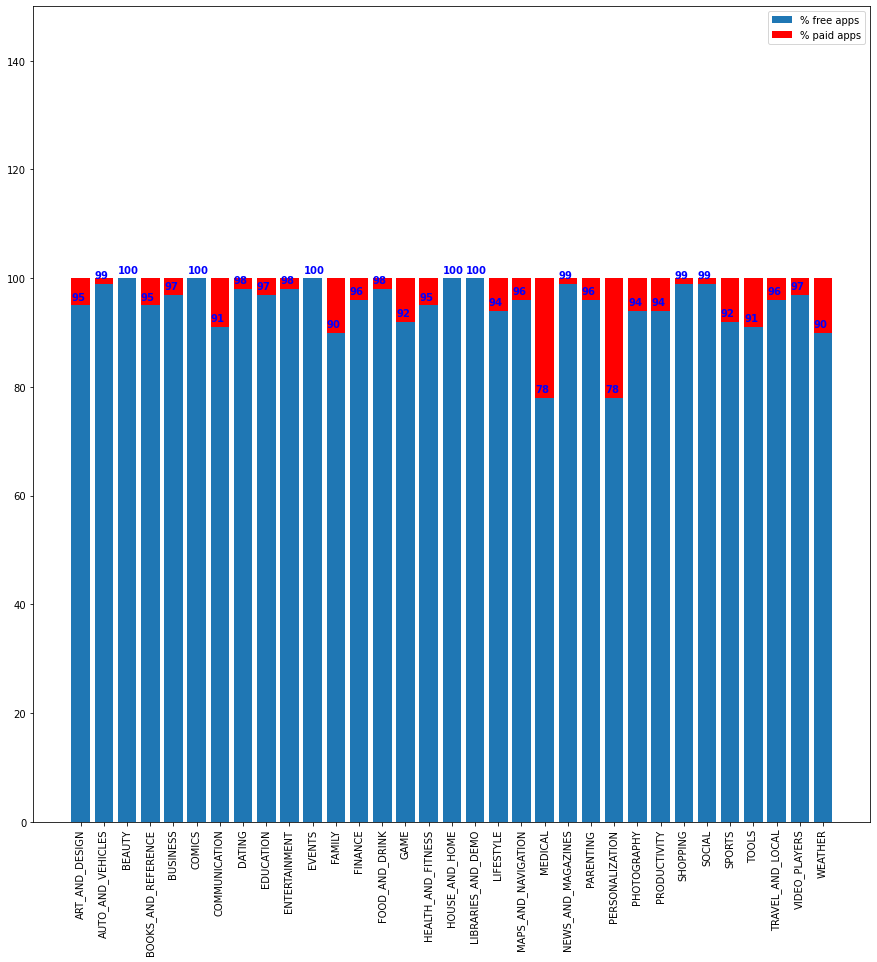

In [87]:
plt.figure(figsize=(15,15))
ax= plt.gca()
ax.bar(temp['Category'],temp['free_app_percentage'],width=0.8)
ax.bar(temp['Category'],temp['paid_app_percentage'],width=0.8, bottom = temp['free_app_percentage'],color='r' )
plt.ylim(0,150)
plt.xticks(rotation=90)
plt.legend(['% free apps','% paid apps'])
y = temp['free_app_percentage']
for i, v in enumerate(y):
    ax.text(i-.40, v + 1, str(v), color='blue', fontweight='bold')

### 8. Draw a pairplot for the dataset

In [88]:
import seaborn as sns

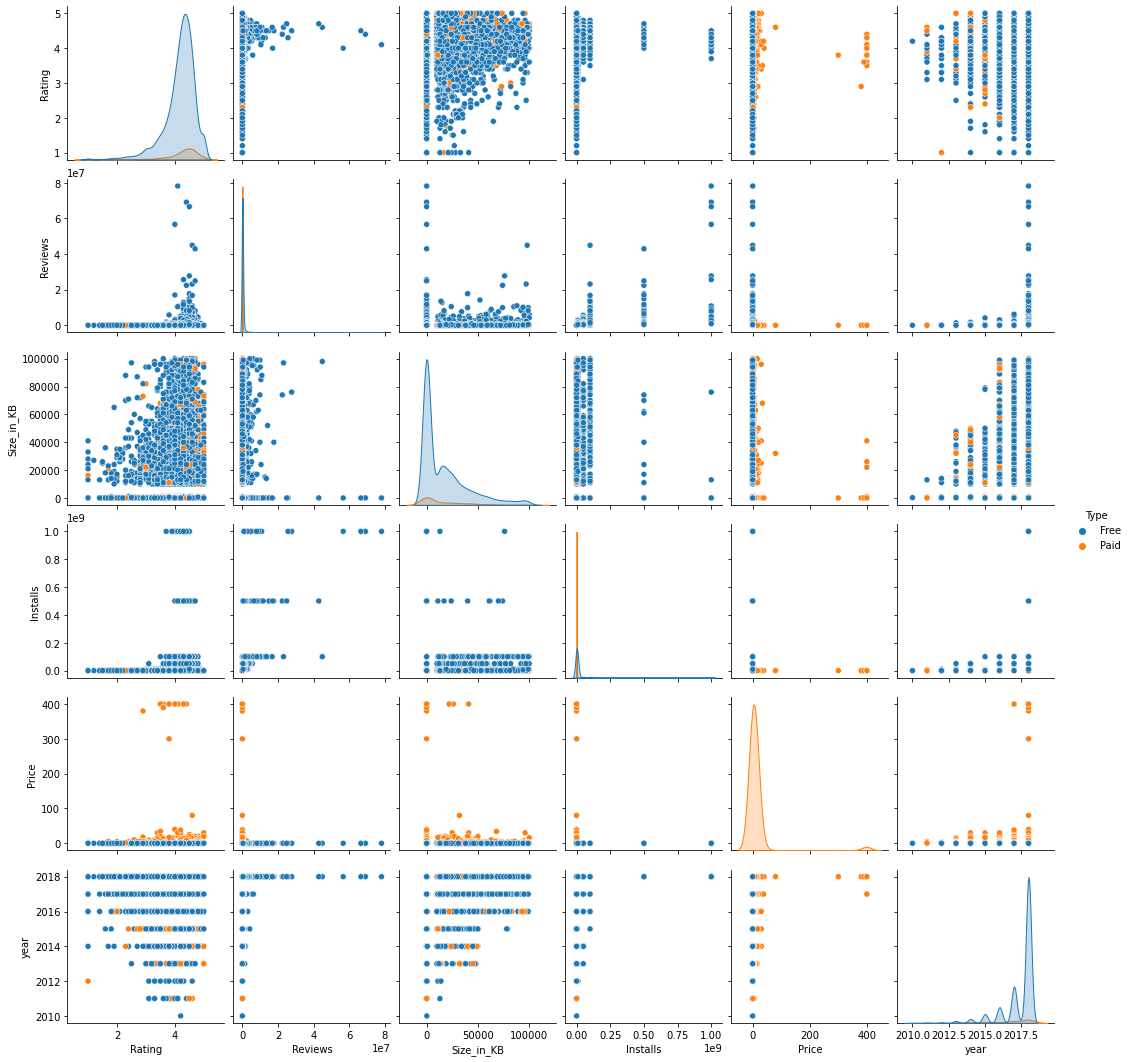

In [89]:
sns.pairplot(data=GPStore, hue='Type');